In [3]:
import torch

In [4]:
T = torch.tensor ([[[0.8, 0.1, 0.1],
                    [0.1,0.6,0.3]],
                   [[0.7, 0.2, 0.1],
                    [0.1, 0.8, 0.1]],
                   [[0.6, 0.2, 0.2],
                    [0.1, 0.4, 0.5]]]
                 )
R = torch.tensor([1.0,0,-1.])
gamma = 0.5
threshold = 0.0001

policy_optimal = torch.tensor ([[1.0, 0.0],
                              [1.0, 0.0],
                              [1.0, 0.0]])

In [44]:
def policy_evaluation (policy, trans_matrix, rewards, gamma, threshold):
    n_state = policy.shape[0]
    V = torch.zeros(n_state)
    
    V_his = [V]
    i = 0
    
    while True:
        print ("iteration = ", i)
        V_temp = torch.zeros(n_state)
        i += 1
        
        for state, actions in enumerate (policy):
            print("\nstate =",state,"action =",actions)
            
            for action, action_prob in enumerate(actions):
                #print("      \naction =",action,"\naction_prob =",action_prob,"\ntrans_matrix[",state, action,"] =",trans_matrix[state, action])
                
                V_temp[state] += action_prob*(R[state] + gamma*torch.dot(trans_matrix[state, action], V))
                #print("V_temp[",state,"] =",V_temp[state] )
                #print("trans_matrix[",state, action,"] =",trans_matrix[state, action])
                print ("V=",V)
                print (torch.dot(trans_matrix[state, action], V))
             
            print ("V =", V)
            print ("V_temp =", V_temp)
                
        print ("\n")    
        
        max_delta = torch.max(torch.abs(V-V_temp))
        V = V_temp.clone()

        V_his.append(V)
        
        if max_delta <= threshold:
            break
    
    return V, V_his

In [6]:
V, V_history = policy_evaluation (policy_optimal, T, R, gamma, threshold)
print ("Функция ценности при оптимальной стратегии:\n{}".format(V))

iteration =  0

state = 0 action = tensor([1., 0.])
trans_matrix[ 0 0 ] = tensor([0.8000, 0.1000, 0.1000])
V= tensor([0., 0., 0.])
tensor(0.)
trans_matrix[ 0 1 ] = tensor([0.1000, 0.6000, 0.3000])
V= tensor([0., 0., 0.])
tensor(0.)
V = tensor([0., 0., 0.])
V_temp = tensor([1., 0., 0.])

state = 1 action = tensor([1., 0.])
trans_matrix[ 1 0 ] = tensor([0.7000, 0.2000, 0.1000])
V= tensor([0., 0., 0.])
tensor(0.)
trans_matrix[ 1 1 ] = tensor([0.1000, 0.8000, 0.1000])
V= tensor([0., 0., 0.])
tensor(0.)
V = tensor([0., 0., 0.])
V_temp = tensor([1., 0., 0.])

state = 2 action = tensor([1., 0.])
trans_matrix[ 2 0 ] = tensor([0.6000, 0.2000, 0.2000])
V= tensor([0., 0., 0.])
tensor(0.)
trans_matrix[ 2 1 ] = tensor([0.1000, 0.4000, 0.5000])
V= tensor([0., 0., 0.])
tensor(0.)
V = tensor([0., 0., 0.])
V_temp = tensor([ 1.,  0., -1.])


iteration =  1

state = 0 action = tensor([1., 0.])
trans_matrix[ 0 0 ] = tensor([0.8000, 0.1000, 0.1000])
V= tensor([ 1.,  0., -1.])
tensor(0.7000)
trans_matrix[ 0

tensor(1.0354)
trans_matrix[ 2 1 ] = tensor([0.1000, 0.4000, 0.5000])
V= tensor([ 1.6780,  0.6254, -0.4826])
tensor(0.1766)
V = tensor([ 1.6780,  0.6254, -0.4826])
V_temp = tensor([ 1.6784,  0.6257, -0.4823])


iteration =  12

state = 0 action = tensor([1., 0.])
trans_matrix[ 0 0 ] = tensor([0.8000, 0.1000, 0.1000])
V= tensor([ 1.6784,  0.6257, -0.4823])
tensor(1.3570)
trans_matrix[ 0 1 ] = tensor([0.1000, 0.6000, 0.3000])
V= tensor([ 1.6784,  0.6257, -0.4823])
tensor(0.3986)
V = tensor([ 1.6784,  0.6257, -0.4823])
V_temp = tensor([1.6785, 0.0000, 0.0000])

state = 1 action = tensor([1., 0.])
trans_matrix[ 1 0 ] = tensor([0.7000, 0.2000, 0.1000])
V= tensor([ 1.6784,  0.6257, -0.4823])
tensor(1.2518)
trans_matrix[ 1 1 ] = tensor([0.1000, 0.8000, 0.1000])
V= tensor([ 1.6784,  0.6257, -0.4823])
tensor(0.6202)
V = tensor([ 1.6784,  0.6257, -0.4823])
V_temp = tensor([1.6785, 0.6259, 0.0000])

state = 2 action = tensor([1., 0.])
trans_matrix[ 2 0 ] = tensor([0.6000, 0.2000, 0.2000])
V= tens

In [7]:
import matplotlib.pyplot as plt

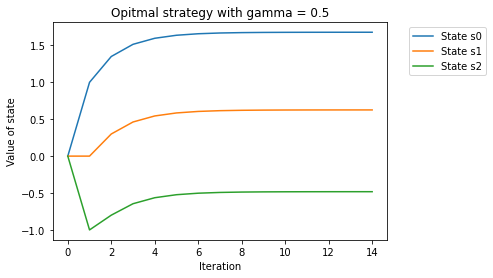

In [43]:
s0 = plt.plot([v[0] for v in V_history], label="State s0")
s1 = plt.plot([v[1] for v in V_history], label="State s1")
s2 = plt.plot([v[2] for v in V_history], label="State s2")
plt.title ('Opitmal strategy with gamma = {}'.format(str(gamma)))
plt.xlabel('Iteration')
plt.ylabel('Value of state')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()